**<big>Data Preprocessing</big>**

**<big>Importing the dataset</big>**

The dataset came in two parts, training and testing. Both the files did not have the column headers, so it was taken from the website and added. Finally, they were combined to avoid repetition in the cleaning process and to have a control over the train and test size.  

In [986]:
import numpy as np
import pandas as pd
test_data = pd.read_csv('datasets/adult.test',skiprows=1) #the first line in the dataset is empty space, so I skip it 
train_data = pd.read_csv('datasets/adult.data',)
index_data = pd.read_csv('datasets/Index')

In [987]:
train_data.shape #looking at the number of rows and columns

(32560, 15)

In [988]:
train_data.head() # getting a look at the actual data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [989]:
test_data.shape #looking at the number of rows and columns

(16280, 15)

In [990]:
test_data.head()# getting a look at the actual data

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [991]:
column_headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
train_data.columns = column_headers
test_data.columns = column_headers

In [992]:
train_data.sample() # a simple check on whether the column names were successfully added

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32164,51,Private,172493,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,12,United-States,<=50K


In [993]:
train_data.duplicated().sum()

24

In [994]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True) #ignore index true resets the index
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       48840 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education-num   48840 non-null  int64 
 5   marital-status  48840 non-null  object
 6   occupation      48840 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital-gain    48840 non-null  int64 
 11  capital-loss    48840 non-null  int64 
 12  hours-per-week  48840 non-null  int64 
 13  native-country  48840 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [995]:
#standardising the text based data in each column
combined_data['workclass'] = combined_data['workclass'].str.lower().str.strip() 
combined_data['education'] = combined_data['education'].str.lower().str.strip()
combined_data['marital-status'] = combined_data['marital-status'].str.lower().str.strip()
combined_data['occupation'] = combined_data['occupation'].str.lower().str.strip()
combined_data['relationship'] = combined_data['relationship'].str.lower().str.strip()
combined_data['race'] = combined_data['race'].str.lower().str.strip()
combined_data['sex'] = combined_data['sex'].str.lower().str.strip()
combined_data['native-country'] = combined_data['native-country'].str.lower().str.strip()
combined_data['income'] = combined_data['income'].str.lower().str.strip()
combined_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
1,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
2,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
3,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,284582,masters,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,39,private,215419,bachelors,13,divorced,prof-specialty,not-in-family,white,female,0,0,36,united-states,<=50k.
48836,64,?,321403,hs-grad,9,widowed,?,other-relative,black,male,0,0,40,united-states,<=50k.
48837,38,private,374983,bachelors,13,married-civ-spouse,prof-specialty,husband,white,male,0,0,50,united-states,<=50k.
48838,44,private,83891,bachelors,13,divorced,adm-clerical,own-child,asian-pac-islander,male,5455,0,40,united-states,<=50k.


In [996]:
combined_data.duplicated().sum()

29

In [997]:
combined_data.describe().T #the T switches the rows and columns

,count,mean,std,min,25%,50%,75%,max
age,48840.0,38.643857,13.710652,17.0,28.0,37.0,48.00,90.0
fnlwgt,48840.0,189665.670434,105604.834700,12285.0,117553.5,178144.5,237647.25,1490400.0
education-num,48840.0,10.078092,2.570954,1.0,9.0,10.0,12.00,16.0
capital-gain,48840.0,1079.067301,7452.168393,0.0,0.0,0.0,0.00,99999.0
capital-loss,48840.0,87.505897,403.012415,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48840.0,40.422400,12.391697,1.0,40.0,40.0,45.00,99.0


In [998]:
combined_data['income'].value_counts()

income
<=50k     24719
<=50k.    12434
>50k       7841
>50k.      3846
Name: count, dtype: int64

In [999]:
#The income column has datapoints with '.'
combined_data['income'] = combined_data['income'].replace('<=50k.','<=50k')
combined_data['income'] = combined_data['income'].replace('>50k.','>50k')
combined_data['income'].value_counts()

income
<=50k    37153
>50k     11687
Name: count, dtype: int64

In [1000]:
combined_data['workclass'].unique()

array(['self-emp-not-inc', 'private', 'state-gov', 'federal-gov',
       'local-gov', '?', 'self-emp-inc', 'without-pay', 'never-worked'],
      dtype=object)

In [1001]:
combined_data['race'].value_counts()

race
white                 41761
black                  4684
asian-pac-islander     1519
amer-indian-eskimo      470
other                   406
Name: count, dtype: int64

In [1002]:
combined_data['sex'].value_counts()

sex
male      32648
female    16192
Name: count, dtype: int64

In [1003]:
combined_data['occupation'].value_counts()

occupation
prof-specialty       6172
craft-repair         6112
exec-managerial      6086
adm-clerical         5610
sales                5504
other-service        4923
machine-op-inspct    3021
?                    2809
transport-moving     2355
handlers-cleaners    2072
farming-fishing      1490
tech-support         1446
protective-serv       983
priv-house-serv       242
armed-forces           15
Name: count, dtype: int64

In [1004]:
combined_data['marital-status'].value_counts()

marital-status
married-civ-spouse       22379
never-married            16115
divorced                  6633
separated                 1530
widowed                   1518
married-spouse-absent      628
married-af-spouse           37
Name: count, dtype: int64

In [1005]:
combined_data['native-country'].value_counts()

native-country
united-states                 43830
mexico                          951
?                               857
philippines                     295
germany                         206
puerto-rico                     184
canada                          182
el-salvador                     155
india                           151
cuba                            138
england                         127
china                           122
south                           115
jamaica                         106
italy                           105
dominican-republic              103
japan                            92
guatemala                        88
poland                           87
vietnam                          86
columbia                         85
haiti                            75
portugal                         67
taiwan                           65
iran                             59
greece                           49
nicaragua                        49
peru         

**<big>Handling Missing Values</big>**

This dataset has missing values represented as '?'. Initially, all the columns with these missing values were found. These values were replaced with NaN using numpy to make it easy to handle them. The missing native country values were imputed based on the mode of the features race and age. The missing values in occupation and workclass were their own value known  as 'unknown' because there could be a relationship between missing values and the income level.  

In [1006]:
(combined_data == '?').sum().sum() # gives the total number of missing values

6465

In [1007]:
#Goes through each column and gives the column name along with the number of missing values
for i in combined_data.columns:
    count = (combined_data[i]=='?').sum()
    if count > 0:
        print(f"{i} has {count} missing values")

workclass has 2799 missing values
occupation has 2809 missing values
native-country has 857 missing values


In [1008]:
#Replacing the '?' with null for easy handling of missing values
import numpy as np

combined_data.replace('?',np.NaN, inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48840 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48840 non-null  int64 
 1   workclass       46041 non-null  object
 2   fnlwgt          48840 non-null  int64 
 3   education       48840 non-null  object
 4   education-num   48840 non-null  int64 
 5   marital-status  48840 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48840 non-null  object
 8   race            48840 non-null  object
 9   sex             48840 non-null  object
 10  capital-gain    48840 non-null  int64 
 11  capital-loss    48840 non-null  int64 
 12  hours-per-week  48840 non-null  int64 
 13  native-country  47983 non-null  object
 14  income          48840 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [1009]:
((combined_data['workclass'].isna()) & (combined_data['occupation'].isna())).sum()

2799

In [1010]:
((combined_data['workclass'].notna()) & (combined_data['occupation'].isna())).sum()

10

In [1011]:
combined_data = combined_data.drop(combined_data[(combined_data['workclass'].notna()) & (combined_data['occupation'].isna())].index)
combined_data.reset_index(drop=True)
combined_data.info()

#I could do conditional imputation and predict the missing occupation based on workclass but it is only 10 rows of data which is about 0.02% of the data. The rest where occupation and workclass is NaN , it is good to leave them in a category called unknown as that could have some pattern. e.g May be  people with unknown jobs are likely to get less than 50k.

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       46031 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      46031 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  47973 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [1012]:
#all the rows where workclass and occupation are null gets replaced with unknown, the info confirms that they both go missin at the same time and they are related. 
combined_data.loc[(combined_data['workclass'].isna()) & (combined_data['occupation'].isna()), ['workclass', 'occupation']] = 'unknown'
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       48830 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      48830 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  47973 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [1013]:
(combined_data['workclass']=='unknown').sum()

2799

In [1014]:
(combined_data['occupation']=='unknown').sum()

2799

In [1015]:
combined_data['native-country'].value_counts() # taking a look at the native country values before imputation

native-country
united-states                 43820
mexico                          951
philippines                     295
germany                         206
puerto-rico                     184
canada                          182
el-salvador                     155
india                           151
cuba                            138
england                         127
china                           122
south                           115
jamaica                         106
italy                           105
dominican-republic              103
japan                            92
guatemala                        88
poland                           87
vietnam                          86
columbia                         85
haiti                            75
portugal                         67
taiwan                           65
iran                             59
greece                           49
nicaragua                        49
peru                             46
ecuador      

In [1016]:
grouped_data = combined_data.groupby(['race', 'age'])

# Iterate over groups and impute missing values in 'native-country' column
for group_name, group_data in grouped_data:
    # Calculate mode of 'native-country' within the group
    mode_native_country = group_data['native-country'].mode().iloc[0]
    # Fill missing values with mode of the group
    combined_data.loc[group_data.index, 'native-country'] = combined_data.loc[group_data.index, 'native-country'].fillna(mode_native_country)

In [1017]:
combined_data['native-country'].value_counts() # checking the native country values before imputation

native-country
united-states                 44640
mexico                          953
philippines                     320
germany                         206
puerto-rico                     185
canada                          182
el-salvador                     155
india                           154
cuba                            138
england                         127
china                           127
south                           115
jamaica                         106
italy                           105
dominican-republic              104
japan                            92
guatemala                        88
poland                           87
vietnam                          86
columbia                         85
haiti                            75
portugal                         67
taiwan                           65
iran                             59
greece                           49
nicaragua                        49
peru                             46
ecuador      

In [1018]:
combined_data.info() #verfiying that there aren't any missing values

<class 'pandas.core.frame.DataFrame'>
Index: 48830 entries, 0 to 48839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48830 non-null  int64 
 1   workclass       48830 non-null  object
 2   fnlwgt          48830 non-null  int64 
 3   education       48830 non-null  object
 4   education-num   48830 non-null  int64 
 5   marital-status  48830 non-null  object
 6   occupation      48830 non-null  object
 7   relationship    48830 non-null  object
 8   race            48830 non-null  object
 9   sex             48830 non-null  object
 10  capital-gain    48830 non-null  int64 
 11  capital-loss    48830 non-null  int64 
 12  hours-per-week  48830 non-null  int64 
 13  native-country  48830 non-null  object
 14  income          48830 non-null  object
dtypes: int64(6), object(9)
memory usage: 7.0+ MB


**<big>Handling Outliers</big>**

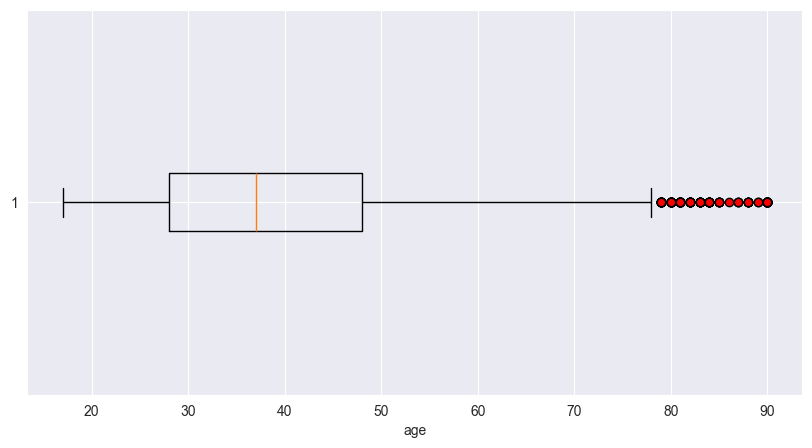

In [1019]:
#Visualizing the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['age'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('age')
plt.show()

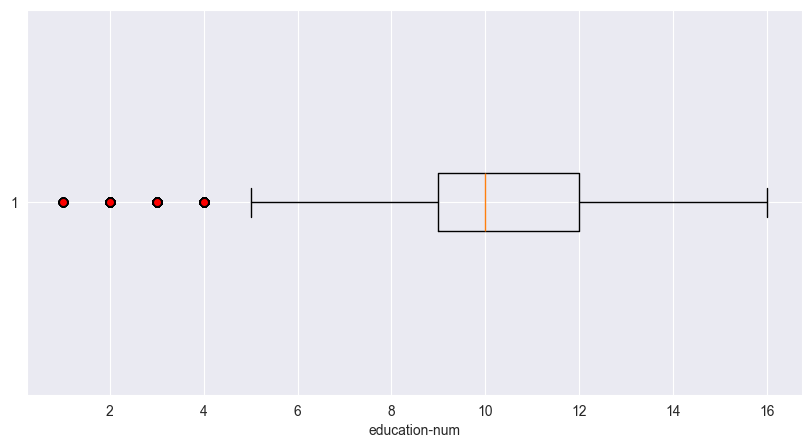

In [1020]:
#Visualizing the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['education-num'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('education-num')
plt.show()

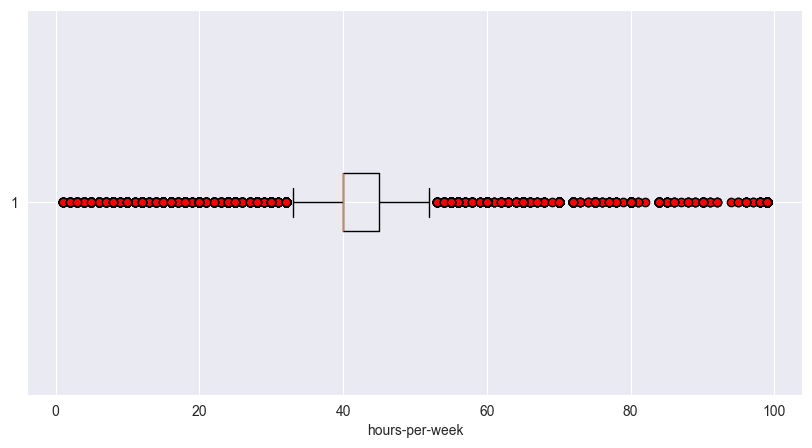

In [1021]:
#Visualizing the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['hours-per-week'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('hours-per-week')
plt.show()

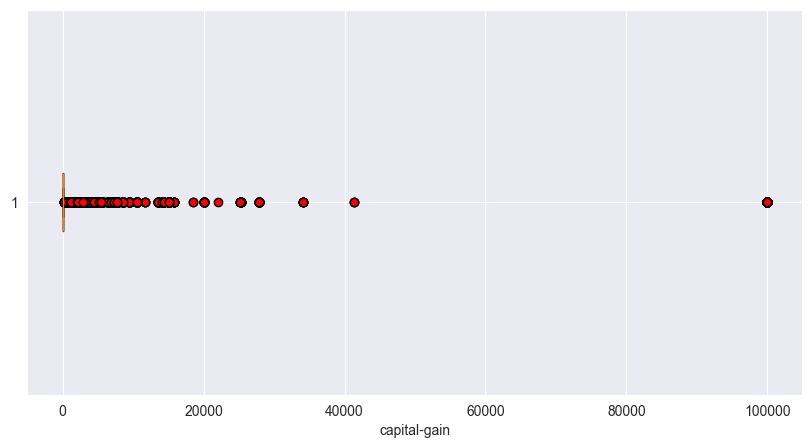

In [1022]:
#Visualizing the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['capital-gain'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('capital-gain')
plt.show()
#according t the results, value greater than 40,000  were considered to be outliers

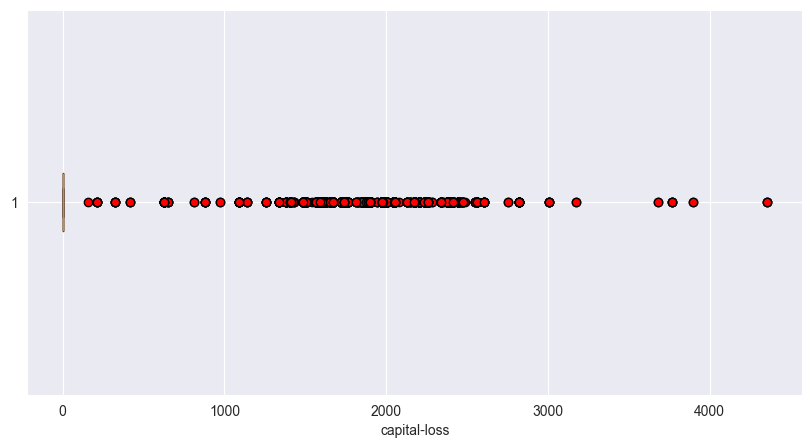

In [1023]:
#Visualizing the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['capital-loss'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('capital-loss')
plt.show()

In [1024]:
(combined_data['capital-gain']>40000).sum()

247

In [1025]:
combined_data['capital-gain'] = combined_data['capital-gain'].apply(lambda x: 40000 if x > 40000 else x)

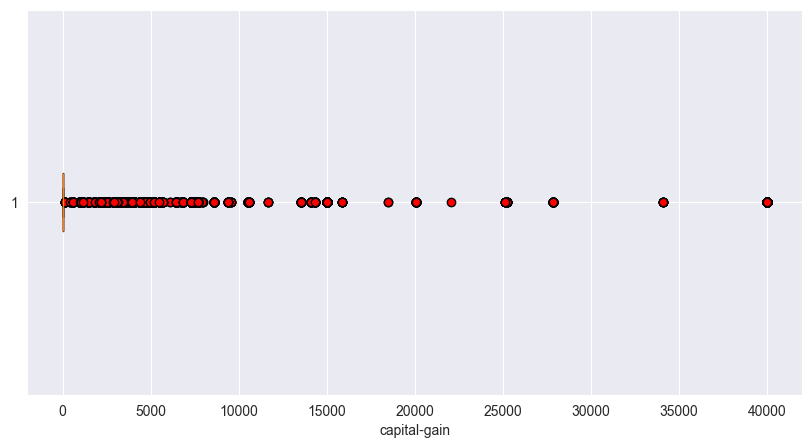

In [1026]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(combined_data['capital-gain'], vert=False, flierprops=dict(markerfacecolor='Red', marker='o'))
plt.xlabel('capital-gain')
plt.show()

**<big>Feature Extraction and Encoding</big>**

In [1027]:
combined_data.drop(columns=['education','fnlwgt'],axis=1, inplace=True) #education number is sorta pointless cause gb doesn't recognize higher or lower scores

combined_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,self-emp-not-inc,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
1,38,private,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
2,53,private,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
3,28,private,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,14,married-civ-spouse,exec-managerial,wife,white,female,0,0,40,united-states,<=50k


In [1028]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_data['income'] = le.fit_transform(combined_data['income'])
combined_data['native-country'] = le.fit_transform(combined_data['native-country'])
combined_data['sex'] = le.fit_transform(combined_data['sex'])
combined_data['race'] = le.fit_transform(combined_data['race'])
combined_data['relationship'] = le.fit_transform(combined_data['relationship'])
combined_data['occupation'] = le.fit_transform(combined_data['occupation'])
combined_data['marital-status'] = le.fit_transform(combined_data['marital-status'])
combined_data['workclass'] = le.fit_transform(combined_data['workclass'])
combined_data.sample(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
12867,46,0,10,0,6,4,4,1,0,0,40,38,0
18459,29,2,10,4,0,1,4,0,0,0,40,38,0
4838,24,2,11,4,12,4,2,0,0,0,40,38,0
45682,71,6,9,6,14,4,4,0,6612,0,42,38,1
44074,30,2,9,2,6,0,4,1,0,0,40,38,0


<Axes: >

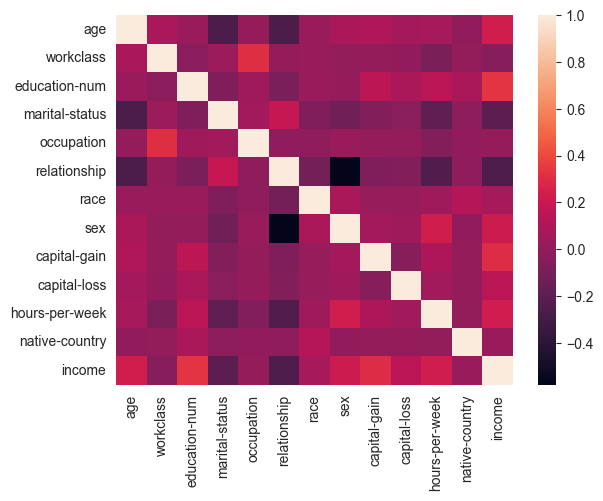

In [1029]:
import seaborn as sns
sns.heatmap(combined_data.corr())
#the darker colour means higher correlation, therefore there is strong correlation between education-num and income 

In [1030]:
combined_data.shape

(48830, 13)

In [1031]:
combined_data.to_csv('datasets/pre_processed_data.csv', index=False)